In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import pickle
from scipy.sparse import coo_matrix
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from tqdm.notebook import tqdm
import os
os.chdir('..')

In [2]:
from mtDNAsim.sim_utils import *

/home/wangkun/mtDNA_simulation/mtDNAsim/sim_utils.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [54]:
mt = pickle.load(open('/data3/wangkun/mtsim_res/res_0415/linear_/41508/mt_allmuts_mid_0.1_41508.pkl', 'rb'))

In [41]:
pre_id = max(sum([list(i) for i in mt['<0_0>']], []))

In [42]:
res = dict()
for gen in [15, 50, 100, 300, 800]:
    res[gen] = dict()
    mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_0415/linear_/41508/mt_allmuts_mid_0.1_41508_{gen}_0.4_0.4_rs.pkl', 'rb'))
    mt = rs_cvt(mt)
    freq = sparse_freq(mt, df=False)
    pre_freq = freq[:, :pre_id+1]
    de_freq = freq[:, pre_id+1:]
    for cutoff in [0, 0.01, 0.05]:
        res[gen][cutoff] = dict()
        res[gen][cutoff]['pre'] = np.array(np.sum(pre_freq>cutoff, axis=1)).flatten()
        res[gen][cutoff]['de'] = np.array(np.sum(de_freq>cutoff, axis=1)).flatten()

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

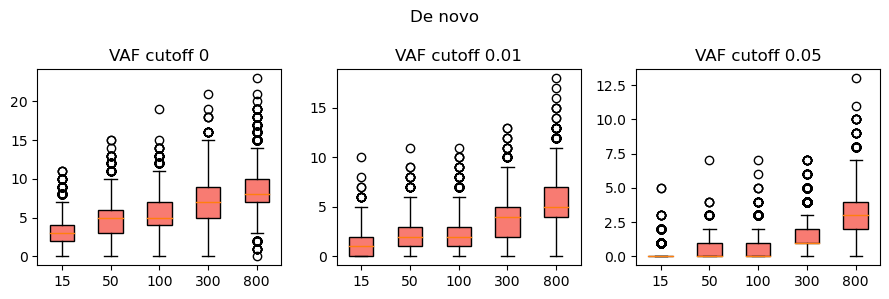

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
xrange=np.arange(1, 6)
for ind, cutoff in enumerate([0,0.01,0.05]):
    de_data = []
    pre_data = []
    for gen in [15, 50, 100, 300, 800]:
        pre_data.append(res[gen][cutoff]['pre'])
        de_data.append(res[gen][cutoff]['de'])
    bp1 = ax[ind].boxplot(de_data, positions=xrange, patch_artist=True)
    # bp2 = ax[ind].boxplot(pre_data, positions=xrange+0.2, patch_artist=True)
    for patch in bp1['boxes']:
        patch.set_facecolor('#f87b72')
    # for patch in bp2['boxes']:
    #     patch.set_facecolor('#28c9cd')
    ax[ind].set_xticks(xrange, [15, 50, 100, 300, 800])
    # ax[ind].set_yscale('log')
    ax[ind].set_title(f'VAF cutoff {cutoff}')
fig.suptitle('De novo')
plt.tight_layout()

In [192]:
mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_0415/linear_/180025/mt_allmuts_mid_0.1_180025_{gen}_0.4_0.8_rs.pkl', 'rb'))
mt = rs_cvt(mt)
freq = sparse_freq(mt)

  0%|          | 0/4793 [00:00<?, ?it/s]

In [193]:
len(Counter([i.split('>')[0]+'>' for i in freq.index]))

65

In [189]:
len(Counter([i.split('>')[0]+'>' for i in freq.index]))

990

In [191]:
len(Counter([i.split('>')[0]+'>' for i in freq.index]))

258

In [56]:
mt = pickle.load(open('/data3/wangkun/mtsim_res/res_0415/linear_/41508/mt_allmuts_mid_0.1_41508.pkl', 'rb'))

In [57]:
tree = Phylo.read(f'/data3/wangkun/mtsim_res/res_0415/linear_/41508/linear_tree_gt_41508.nwk', format='newick')

In [58]:
new_mts_1 = dict()
for cell in tree.get_terminals():
    new_mts_1[cell.name] = [deepcopy(mt[cell.name])]

In [129]:
def ncell_division_with_mt1(mt_muts, global_mutid, mut_rate, mt_copynumber=2, target_nmts=500, p=0.5, s=1):
    res = []
    for cell in mt_muts:
        res1, res2, global_mutid = cell_division_with_mt1(cell, global_mutid, mut_rate, mt_copynumber=mt_copynumber)
        res.append(res1)
        res.append(res2)
    n_cells = len(res)
    res_new = []
    sel = [bool(int(i)) for i in ''.join(np.random.choice('10,00,11'.split(','), n_cells//2, p=[s, (1-p)*(1-s), p*(1-s)]))]
    # while (np.sum(sel)<0.9*n_cells/2) or (np.sum(sel)>1.1*n_cells/2):
    #     sel = [bool(int(i)) for i in ''.join(np.random.choice('10,00,11'.split(','), n_cells//2, p=[s, (1-p)*(1-s), p*(1-s)]))]
    print([s, (1-p)*(1-s), p*(1-s)])
    print(sel)
    # for i in np.where(np.random.binomial(1, p, n_cells))[0]:
    #     res_new.append(res[i])
    for ind, choice in enumerate(sel):
        if choice:
            res_new.append(res[ind])
    return res_new, global_mutid 

In [130]:
mt_new = ncell_division_with_mt1(new_mts_1['<18_4609>'], 100000, 0.4, mt_copynumber=2, target_nmts=500, p=0.5, s=0.2)

[0.2, 0.4, 0.4]
[True, True]


In [110]:
len(mt_new[0])

0

In [ ]:
tree = Phylo.read(f'/data3/wangkun/mtsim_res/res_0415/{data_path}{filename}/{diff_model}_tree_gt_{filename}.nwk', format='newick')
tree_origin = pd.read_csv(f'/data3/wangkun/mtsim_res/res_0415/{data_path}{filename}/tree_origin_{diff_model}_{filename}.csv')
# for imb in [0.1, 1, 5]:
imb = 0.1

mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_0415/{data_path}{filename}/mt_allmuts_{bottleneck}_{imb}_{filename}.pkl', 'rb'))  
sel_cells = [i.name for i in tree.get_terminals()]
max_mut_id = max([max([max(list(i)+[0]) for i in mt[j]]+[0]) for j in sel_cells])

new_mts_1 = dict()
for cell in tree.get_terminals():
    new_mts_1[cell.name] = [deepcopy(mt[cell.name])]

gen = 0
with tqdm(total=800) as pbar:
    for i in [15, 35, 50, 200, 500]:
        for _ in range(i):
            gen += 1
            cell_number = np.sum([len(new_mts_1[i]) for i in new_mts_1.keys()])
            if cell_number > 6000:
                p = 0.433
            elif cell_number < 4000:
                p = 0.6
            else:
                p = 0.5
            for cell in tree.get_terminals():
                tmp = ncell_division_with_mt1(new_mts_1[cell.name], max_mut_id, mt_mu, p=p, s=s)
                max_mut_id = tmp[-1]
                new_mts_1[cell.name] = tmp[0]  
            pbar.update(1)

In [51]:
import phylovelo as pv

In [90]:
simid='41508'

In [91]:

# count = pd.read_csv(path+f'/count_linear_{simid}.csv',index_col=0)

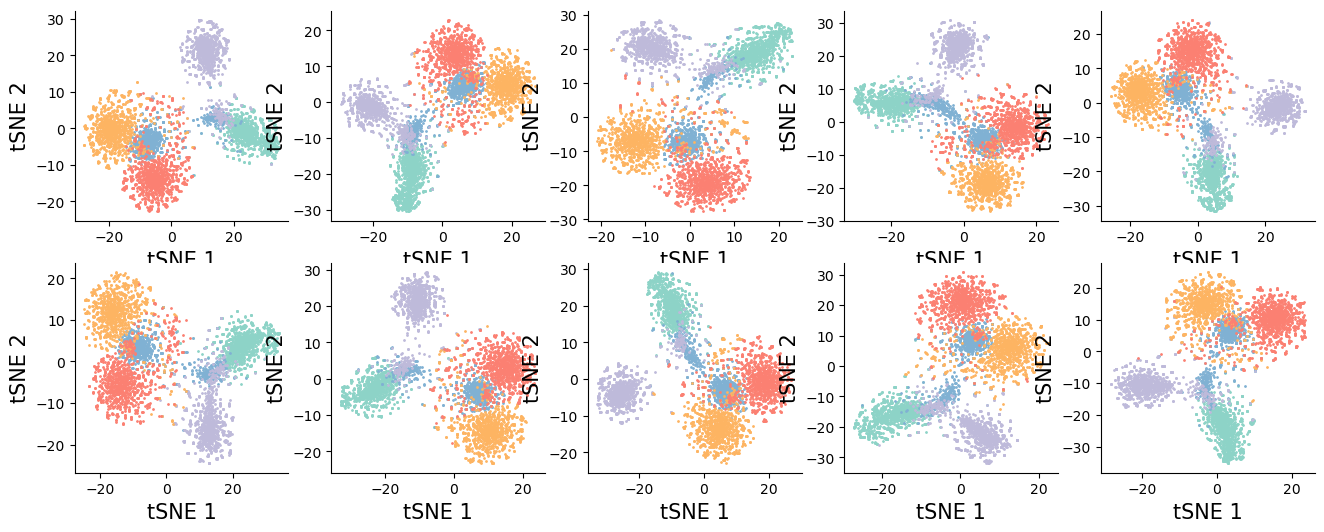

In [137]:
fig, ax = plt.subplots(2, 5, figsize=(3.2*5,3*2))
for ind, simid in enumerate(os.listdir('/data3/wangkun/mtsim_res/res_0415/bifurcated_/')):
    path = f'/data3/wangkun/mtsim_res/res_0415/bifurcated_/{simid}'
    lineage_info = pd.read_csv(path+f'/tree_origin_bif_{simid}.csv')
    cell_names = [f'<{i}_{j}>' for i,j in zip(lineage_info['generation'], lineage_info['cell_id'])]
    state_map = dict(zip(cell_names, lineage_info['state']))
    Xdr = pd.read_csv(f'/data3/wangkun/mtsim_res/res_0415/bifurcated_/{simid}/tsne_bif_{simid}.csv', index_col=0)
    cell_states = np.array([state_map[i] for i in Xdr.index])
    
    
    cmps = ['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072']
    for i in range(5):
        ax[ind//5][ind%5].scatter(Xdr.iloc[cell_states==i, 0], Xdr.iloc[cell_states==i, 1], c=cmps[i],s=1)
    ax[ind//5][ind%5].set_xlabel('tSNE 1', fontsize=15)
    ax[ind//5][ind%5].set_ylabel('tSNE 2', fontsize=15)
    ax[ind//5][ind%5].spines['right'].set_visible(False)
    ax[ind//5][ind%5].spines['top'].set_visible(False)

In [110]:
simid='73453'

In [112]:
path = f'/data3/wangkun/mtsim_res/res_0415/bifurcated_/{simid}'
lineage_info = pd.read_csv(path+f'/tree_origin_bif_{simid}.csv')
cell_names = [f'<{i}_{j}>' for i,j in zip(lineage_info['generation'], lineage_info['cell_id'])]
state_map = dict(zip(cell_names, lineage_info['state']))
count = pd.read_csv(f'/data3/wangkun/mtsim_res/res_0415/bifurcated_/{simid}/count_bif_{simid}.csv', index_col=0)
cell_states = np.array([state_map[i] for i in count.index])

In [116]:
sd = pv.scData()
sd.count=count
sd.cell_states = np.array(cell_states)

In [135]:
sd.dimensionality_reduction(method='tsne', scale=100, perplexity=150, target='count')

/home/wangkun/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wangkun/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


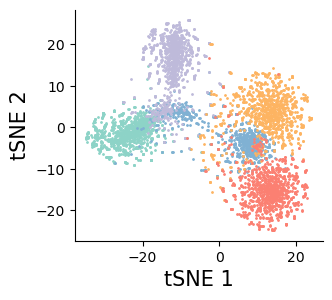

In [136]:
fig, ax = plt.subplots(figsize=(3.2,3))
cmps = ['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072']
for i in range(5):
    ax.scatter(sd.Xdr.iloc[sd.cell_states==i, 0], sd.Xdr.iloc[sd.cell_states==i, 1], c=cmps[i],s=1)
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [247]:
# tree = Phylo.read(f'/data3/wangkun/mtsim_res/res_0415/linear_/41508/clonal_expansion_tree_0.9_800.nwk', format='newick')
tree = Phylo.read(f'/data3/wangkun/mtsim_res/res_0415/linear_/41508/linear_tree_gt_41508.nwk', format='newick')

In [248]:
clone = ['<18_4023>', '<17_3563>', '<23_2593>']

In [264]:
res = tree.common_ancestor(clone)
for i in Phylo.BaseTree._level_traverse(res, lambda elem: elem.clades):
    termi = [i.name for i in i.get_terminals()]
    isin = np.isin(clone, termi)
    if np.sum(isin)/len(isin) < 0.5:
        break
    else:
        res = i

In [ ]:
np.random.choice(tree.cl)

In [139]:
def find_ancestor(tree, clone, cutoff):
    res = tree.common_ancestor(clone)
    level = int(res.name.split('_')[0][1:])
    coverage = []
    best_coverage = 1
    ress = []
    for i in Phylo.BaseTree._level_traverse(res, lambda elem: elem.clades):
        curr_level = int(i.name.split('_')[0][1:])
        if curr_level > level:
            level = curr_level
            if np.sum(np.array(coverage)>cutoff)==0:
                break
            else:
                res = ress[np.where(np.array(coverage)==max(coverage))[0][0]]
            coverage = []
            ress = []
        termi = [i.name for i in i.get_terminals()]
        coverage.append(np.sum(np.isin(clone, termi))/len(clone))
        ress.append(i)
        
    return res.name

In [159]:
# def read_tree(file):
#     tree = Phylo.read(file, format="newick")
#     node1 = tree.find_any(name='<1_0>')
#     node2 = tree.find_any(name='<1_1>')
#     tree_new = Phylo.BaseTree.Clade(branch_length=1, name='<0_0>')
#     tree_new.clades=[node1, node2]
#     return tree_new
def read_tree(file):
    with open(file, 'r') as f:
        tree_nwk = f.readline()
    tree_nwk = StringIO(tree_nwk)
    tree = Phylo.read(tree_nwk, format='newick')
    return tree

In [183]:
tree=read_tree("/syn1/wangxin/work/mtsim/0416/res_0415/linear_bn/603886/linear_tree_gt_603886.nwk")

In [173]:
tree.root

Clade(branch_length=0.1046587519846261, name='<0_0>')

In [227]:
# tree = Phylo.read("/syn1/wangxin/work/mtsim/0416/trees/original_trees/clonal_expansion_tree_603886_0.9_800.nwk", format="newick")
tree = read_tree("/syn1/wangxin/work/mtsim/0416/res_0415/linear_const/120341/linear_tree_gt_120341.nwk")
clone_info = pd.read_csv("/syn1/wangxin/work/mtsim/0416/CIV/CIV_clones_120341_800gen_0.9.csv")
ls1 =[]
for i in tqdm(clone_info["Clone"].value_counts().index):
    cells = list(clone_info["Cell"][clone_info["Clone"] == i].values)
    cells = [i.split(">")[0]+">" for i in cells]
    ls1.append(find_ancestor(tree, cells, 0.8))
    # break

  0%|          | 0/28 [00:00<?, ?it/s]

['981189',
 '804784',
 '937193',
 '370732',
 '180025',
 '596221',
 '403782',
 '41508',
 '603886',
 '173076']

In [470]:
mvs = []
mrca8s = []

In [471]:

for i in os.listdir('/data3/wangkun/mtsim_res/res_0415/linear_'):
    mv1 = pd.read_csv(f"/syn1/wangxin/work/mtsim/0416/CIV/meanvar_CIV_{i}_800gen_0.25.csv")
    mvv = np.array(mv1['MV1'])
    mrca8 = np.array([int(i.split('_')[0][1:]) for i in mv1['AC']])
    mvs.append(list(mvv))
    mrca8s.append(list(mrca8))

In [472]:
for i in os.listdir('/data3/wangkun/mtsim_res/res_0415/linear_const'):
    mv1 = pd.read_csv(f"/syn1/wangxin/work/mtsim/0416/CIV/meanvar_CIV_{i}_800gen_0.25.csv")
    mvv = np.array(mv1['MV1'])
    mrca8 = np.array([int(i.split('_')[0][1:]) for i in mv1['AC']])
    mvs.append(list(mvv))
    mrca8s.append(list(mrca8))

In [477]:
mvs = np.array(sum(mvs, []))
mrca8s = np.array(sum(mrca8s, []))

0.72

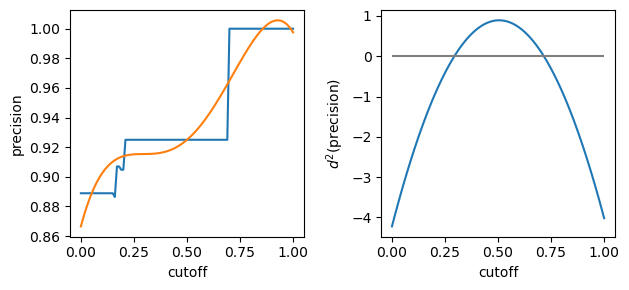

In [476]:
best_cutoff(mvv, mrca8, correction=True, generation_cutoff=5)

In [432]:
def best_cutoff(mv1, generation, generation_cutoff=10, correction=False, plot=True):
    mv1, generation = np.array(mv1), np.array(generation)
    x = np.linspace(0, 1, 101)
    precision = []
    for cutoff in x:
        generation_t = generation[mv1>cutoff]
        if len(generation_t) == 0:
            precision.append(1)
        else:
            precision.append(np.sum(generation_t>generation_cutoff)/len(generation_t))
    if correction:
        for i in range(20, len(precision)):
            if precision[i] < precision[i-1]:
                precision[i] = precision[i-1]
    if plot:
        fit = np.poly1d(np.polyfit(x, precision, 4))
        fig, ax = plt.subplots(1, 2, figsize=(3.2*2,3))
        ax[1].plot(x, fit.deriv().deriv()(x))
        ax[1].hlines(0,1,0, color='tab:gray')
        ax[1].set_xlabel('cutoff')
        ax[1].set_ylabel('$d^2$(precision)')
    
        ax[0].plot(x, precision)
        ax[0].set_xlabel('cutoff')
        ax[0].set_ylabel('precision')
        ax[0].plot(x, fit(x))
    d2 = fit.deriv().deriv()(x)
    x = x[40:]
    d2 = d2[40:]
    plt.tight_layout()
    return x[d2<0][0]

In [464]:
x = np.linspace(0, 1, 51)
precision = []
for cutoff in x:
    mrca_t = mrca8s[mvs>5]
    if len(mrca_t) == 0:
        precision.append(1)
    else:
        precision.append(np.sum(mrca_t>5)/len(mrca_t))

In [465]:
fit = np.poly1d(np.polyfit(x, precision, 4))

Text(0, 0.5, '$d^2$(precision)')

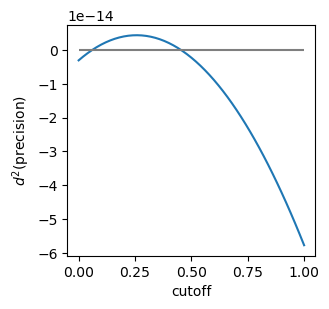

In [466]:
fig, ax = plt.subplots(figsize=(3.2,3))
plt.plot(x, fit.deriv().deriv()(x))
plt.hlines(0,1,0, color='tab:gray')
plt.xlabel('cutoff')
plt.ylabel('$d^2$(precision)')

In [467]:
x[fit.deriv().deriv()(x)<0][8]

0.54

In [468]:
fit.deriv().deriv()(x)<0

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

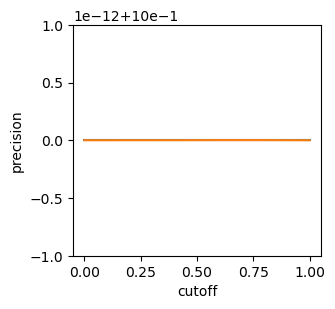

In [469]:
fig, ax = plt.subplots(figsize=(3.2,3))
plt.plot(x, precision)
plt.xlabel('cutoff')
plt.ylabel('precision')
plt.plot(x, fit(x))

In [254]:
precision

[0.3392857142857143,
 0.3392857142857143,
 0.3392857142857143,
 0.3392857142857143,
 0.32727272727272727,
 0.3269230769230769,
 0.37777777777777777,
 0.5483870967741935,
 0.6,
 0.631578947368421,
 0.7142857142857143,
 0.6666666666666666,
 0.5,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

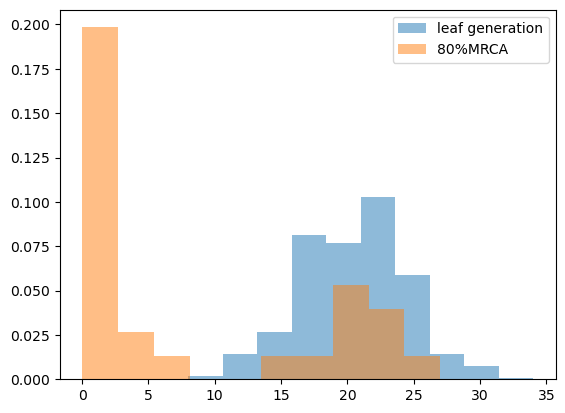

In [235]:
plt.hist([int(i.name.split('_')[0][1:]) for i in tree.get_terminals()], density=True, alpha=0.5, label='leaf generation')
plt.hist(np.array([int(i.split('_')[0][1:]) for i in ls1]), density=True, alpha=0.5, label='80%MRCA')
plt.legend()

In [225]:
np.mean([int(i.name.split('_')[0][1:]) for i in tree.get_terminals()])

20.7118

In [226]:
np.std([int(i.name.split('_')[0][1:]) for i in tree.get_terminals()])

3.9705340648330925

(array([12.,  2.,  2.,  0.,  0.,  1.,  1.,  0.,  2.,  4.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

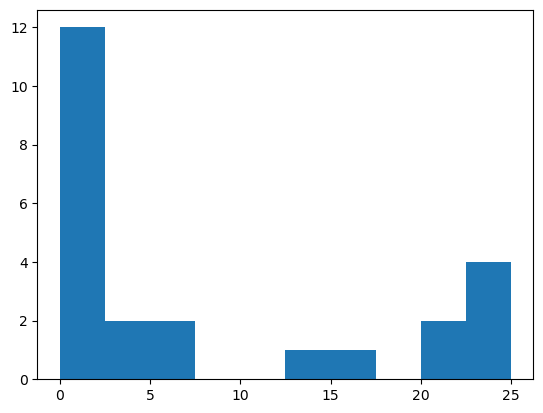

In [218]:
plt.hist(np.array([int(i.split('_')[0][1:]) for i in ls1]))

In [156]:
find_ancestor(tree, clone, 0.3)

NameError: name 'clone' is not defined

In [268]:
res

Clade(branch_length=0.07068804501628101, name='<11_31>')

In [240]:
tree.find_any(name='<0_0>')

In [241]:
tree.get_path('<3_1>')

[Clade(branch_length=0.23541365231904293, name='<1_1>'),
 Clade(branch_length=1.8087515395748675, name='<2_0>'),
 Clade(branch_length=1.5912486159909554, name='<3_1>')]

In [242]:
tree.common_ancestor(['<1_1>', '<1_0>'])

Clade(branch_length=4.0, name='<33_67>')

In [198]:
tree=Phylo.read('/data3/wangkun/mtsim_res/res_0415/bifurcated_/123456/bif_tree_gt_123456_1.nwk', format='newick')